<a href="https://colab.research.google.com/github/PriyankaMath/Dimensionality-Reduction/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
! ls "/content/gdrive/MyDrive/Colab Notebooks/255DataMining/dataset/Dimensionality-Reduction/Image-dataset/fashion-mnist/fashion-mnist_test.csv"


'/content/gdrive/MyDrive/Colab Notebooks/255DataMining/dataset/Dimensionality-Reduction/Image-dataset/fashion-mnist/fashion-mnist_test.csv'


#Image dataset

In [3]:
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/255DataMining/dataset/Dimensionality-Reduction/Image-dataset/fashion-mnist/fashion-mnist_test.csv")


In [4]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
# Save the data points as 'input_data'
input_data = df.iloc[:,1:] / 255
# Check the shape of the input data
print('Shape of the input data',input_data.shape)

Shape of the input data (10000, 784)


In [6]:
# Save the label(in 0-9 format) as 'target'
target = df[['label']].iloc[:, :]
# Check the shape of the label/category
print('Shape of the input label', target.shape)

Shape of the input label (10000, 1)


In [7]:
# Manually enter the meaningful name of each label
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

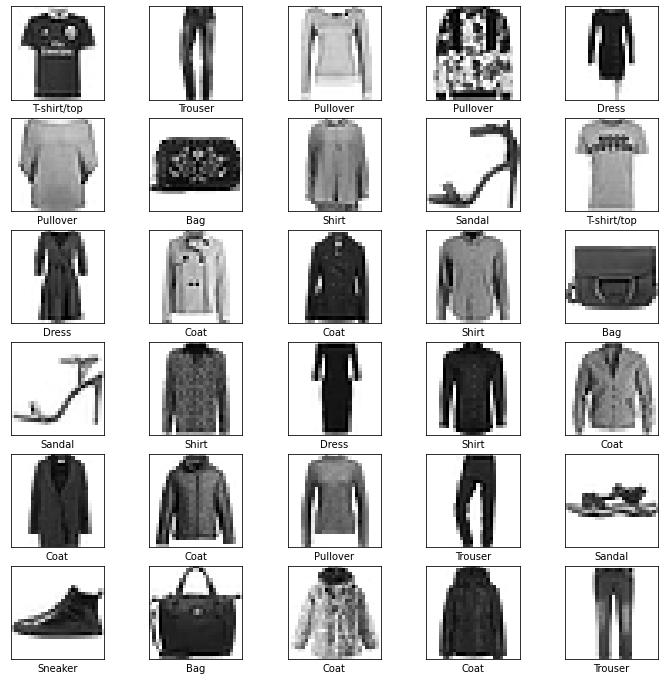

In [8]:
# Set the figure size
plt.figure(figsize=(12,12))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(input_data.iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[target.label.iloc[i]])

# PCA

In [9]:
pca = PCA(2)  # project from 10000 to 2 dimensions
projected = pca.fit_transform(input_data)
print(input_data.shape)
print(projected.shape)

(10000, 784)
(10000, 2)


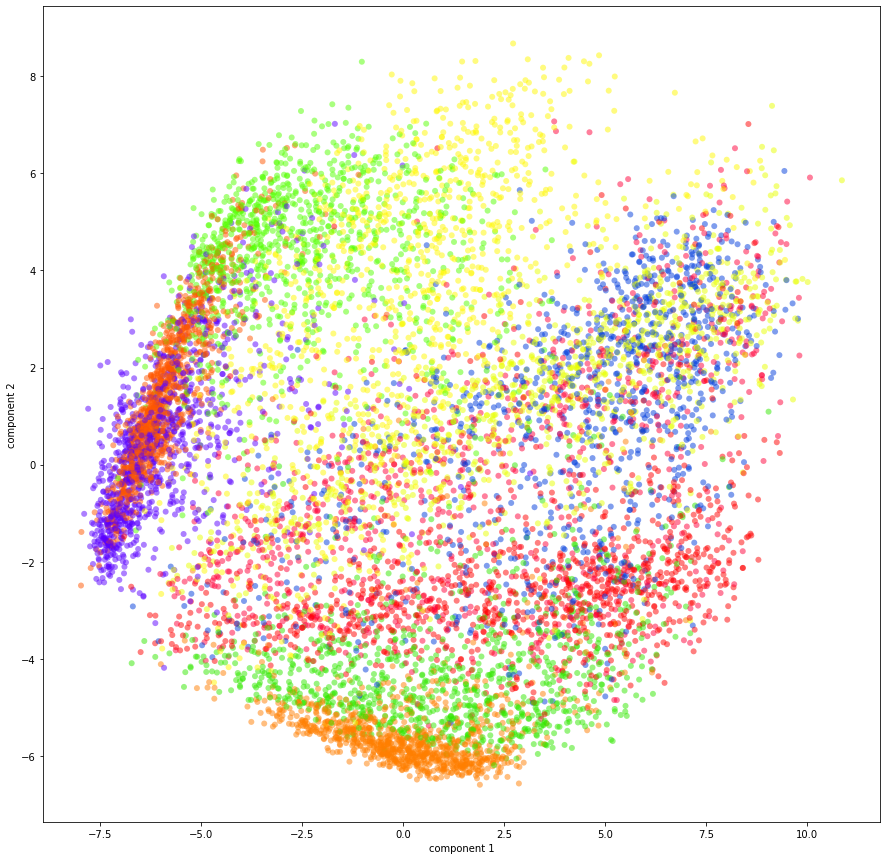

In [10]:
plt.figure(figsize=(15, 15))
plt.scatter(projected[:, 0], projected[:, 1],
            c=target['label'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

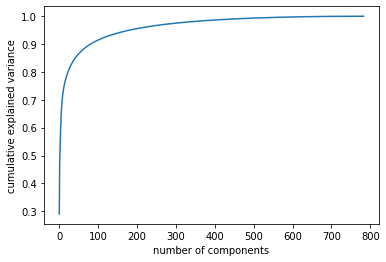

In [11]:
pca = PCA().fit(input_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [12]:
pca = PCA(n_components=100)
reduced = pca.fit_transform(input_data)
print(input_data.shape)
print(reduced.shape)

(10000, 784)
(10000, 100)


# Singular Value Decomposition (SVD)

In [13]:
from sklearn.decomposition import TruncatedSVD

In [14]:
svd = TruncatedSVD(n_components=2)
svd.fit(input_data)
svd_transform = svd.transform(input_data)
print(input_data.shape)
print(svd_transform.shape)

(10000, 784)
(10000, 2)


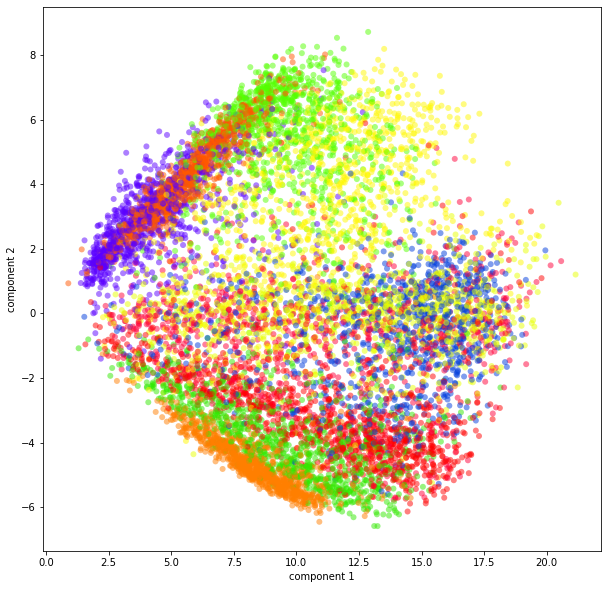

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(svd_transform[:, 0], svd_transform[:, 1],
            c=target['label'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

#Locally Linear Embedding (LLE)

In [16]:
from sklearn.manifold import LocallyLinearEmbedding

lle= LocallyLinearEmbedding(n_neighbors=5, n_components=2)
lle_transform=lle.fit_transform(input_data)

In [17]:
print(input_data.shape)
print(lle_transform.shape)

(10000, 784)
(10000, 2)


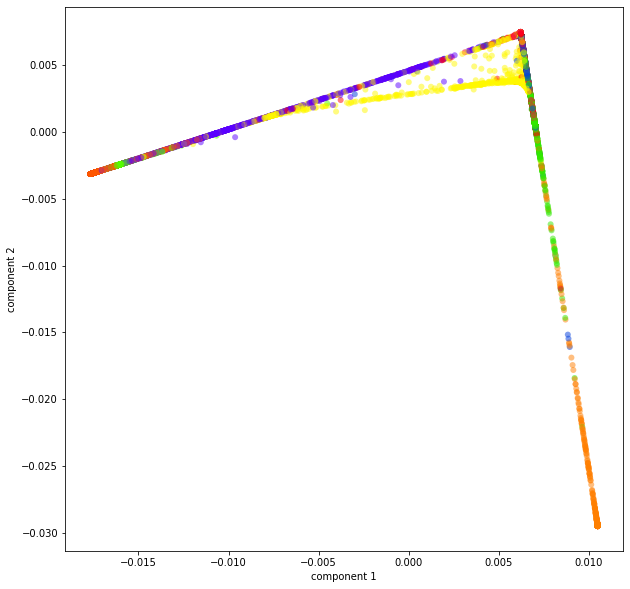

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter(lle_transform[:, 0], lle_transform[:, 1],
            c=target['label'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

# t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_transform = tsne.fit_transform(input_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.017s...
[t-SNE] Computed neighbors for 10000 samples in 160.431s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.786803
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.245071
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170

In [20]:
print(input_data.shape)
print(tsne_transform.shape)

(10000, 784)
(10000, 2)


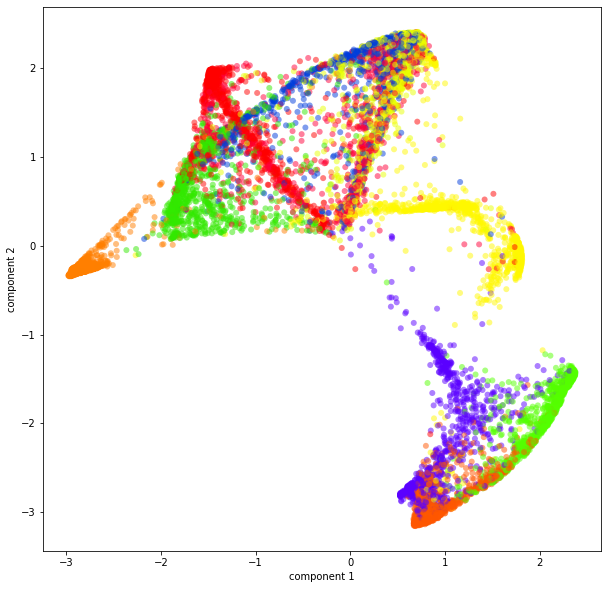

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transform[:, 0], tsne_transform[:, 1],
            c=target['label'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

# Isometric Mapping (ISOMAP)

In [22]:
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(input_data)
isomap_transform = iso.transform(input_data)

In [23]:
print(input_data.shape)
print(isomap_transform.shape)

(10000, 784)
(10000, 2)


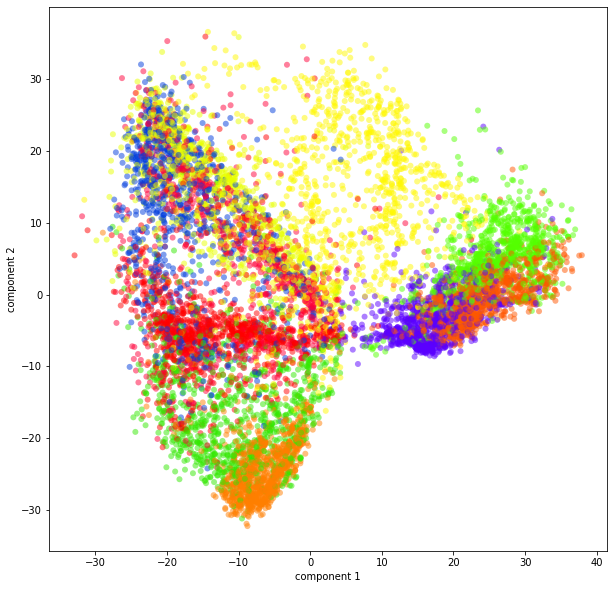

In [24]:
plt.figure(figsize=(10, 10))
plt.scatter(isomap_transform[:, 0], isomap_transform[:, 1],
            c=target['label'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

# Uniform Manifold Approximation and Projection (UMAP)

In [25]:
!pip install umap-learn

import umap.umap_ as umap

     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 28.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=156d278d55796504cdb54a3e317c63e2941015ea4c44488c5cc0c54f33271355
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=4a5151a72ac7c58287ef1cdcecf35baf0f992f845703ce08be42464047f8bfed
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [26]:
umap_transform =  umap.UMAP(n_components=2, random_state=42).fit_transform(input_data)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [27]:
print(input_data.shape)
print(umap_transform.shape)

(10000, 784)
(10000, 2)


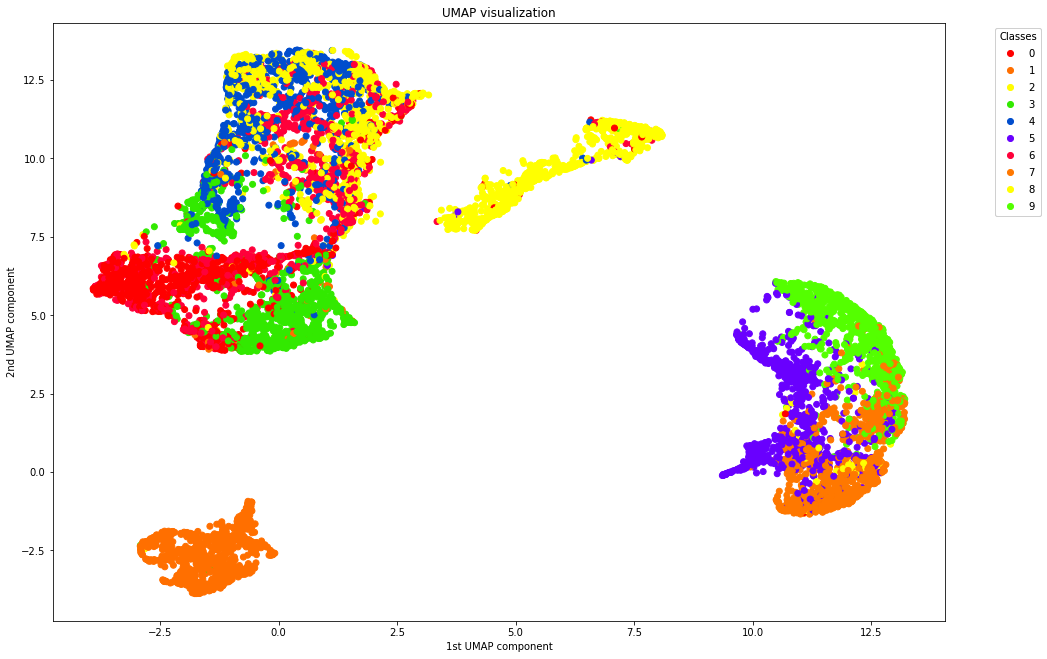

In [28]:
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=umap_transform[:,0], 
    y=umap_transform[:,1], 
    c=target['label'], 
    cmap=plt.cm.get_cmap('prism')
)
# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("UMAP visualization")
plt.xlabel("1st UMAP component")
plt.ylabel("2nd UMAP component")
plt.show()

# Tabular Data

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [35]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#PCA

In [36]:
pca = PCA(2)  # project from 10000 to 2 dimensions
projected = pca.fit_transform(df)
print(df.shape)
print(projected.shape)

(569, 30)
(569, 2)


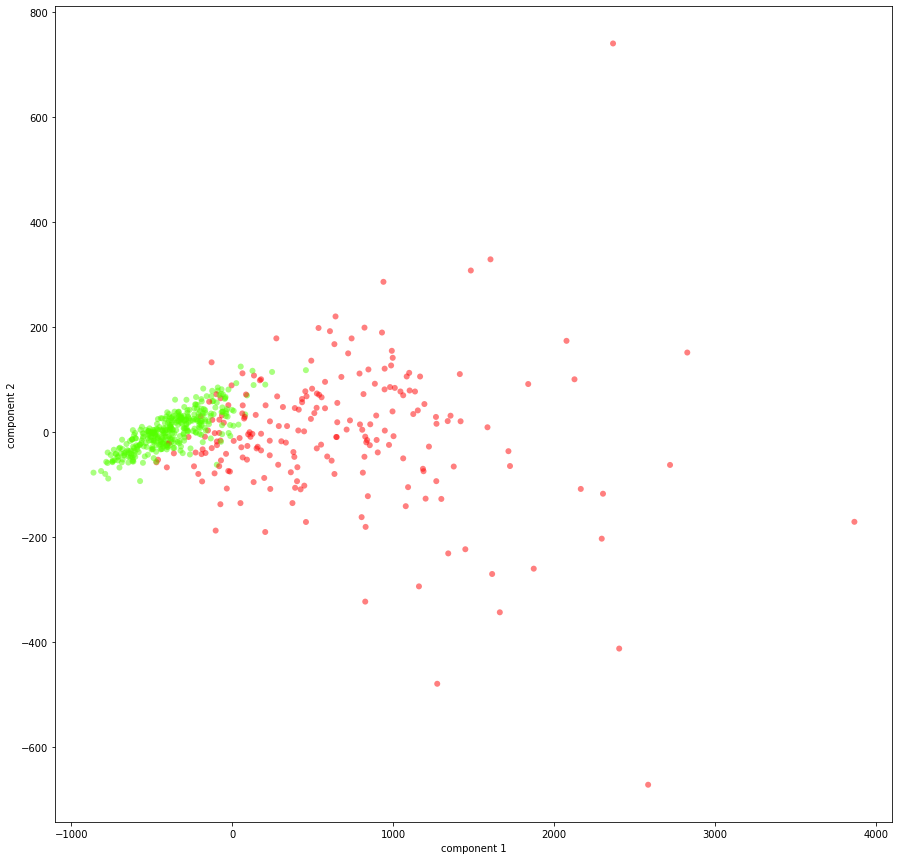

In [39]:
plt.figure(figsize=(15, 15))
plt.scatter(projected[:, 0], projected[:, 1],
            c=cancer['target'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

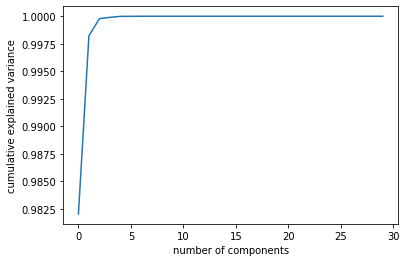

In [40]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [43]:
pca = PCA(n_components=5)
reduced = pca.fit_transform(df)
print(df.shape)
print(reduced.shape)

(569, 30)
(569, 5)


# Singular Value Decomposition (SVD)

In [44]:
svd = TruncatedSVD(n_components=2)
svd.fit(df)
svd_transform = svd.transform(df)
print(df.shape)
print(svd_transform.shape)

(569, 30)
(569, 2)


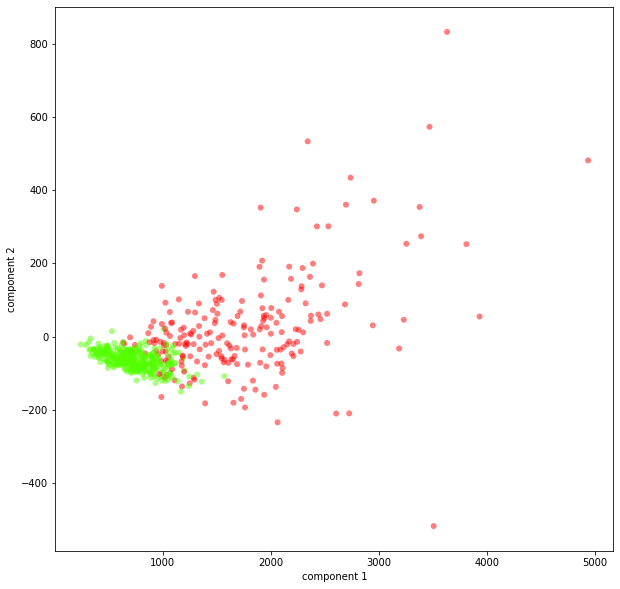

In [45]:
plt.figure(figsize=(10, 10))
plt.scatter(svd_transform[:, 0], svd_transform[:, 1],
            c=cancer['target'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

#Locally Linear Embedding (LLE)

In [46]:
lle= LocallyLinearEmbedding(n_neighbors=5, n_components=2)
lle_transform=lle.fit_transform(df)

In [47]:
print(df.shape)
print(lle_transform.shape)

(569, 30)
(569, 2)


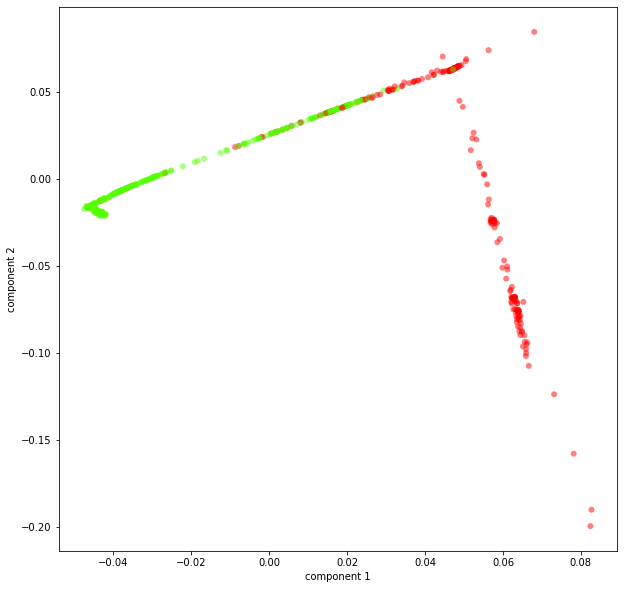

In [48]:
plt.figure(figsize=(10, 10))
plt.scatter(lle_transform[:, 0], lle_transform[:, 1],
            c=cancer['target'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

# t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [49]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_transform = tsne.fit_transform(df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.002s...
[t-SNE] Computed neighbors for 569 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.436928
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


In [50]:
print(df.shape)
print(tsne_transform.shape)

(569, 30)
(569, 2)


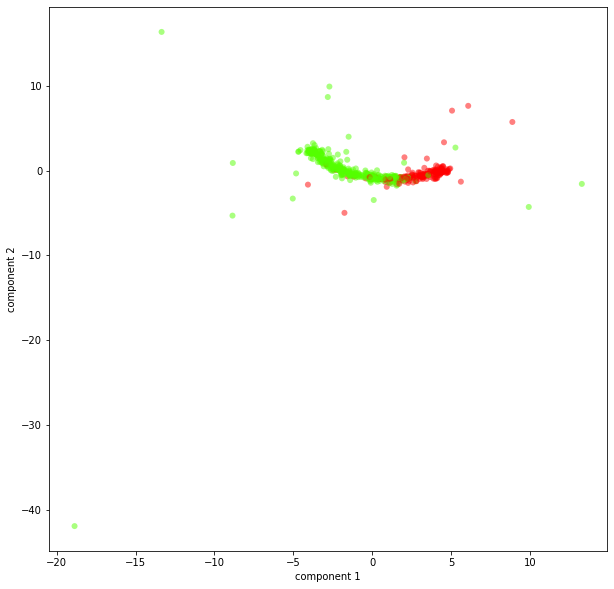

In [51]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transform[:, 0], tsne_transform[:, 1],
            c=cancer['target'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

# Isometric Mapping (ISOMAP)

In [52]:
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(df)
isomap_transform = iso.transform(df)

In [53]:
print(df.shape)
print(isomap_transform.shape)

(569, 30)
(569, 2)


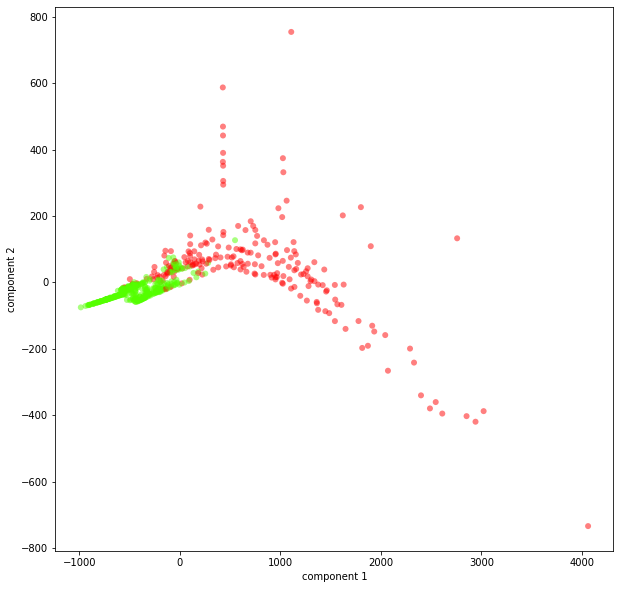

In [55]:
plt.figure(figsize=(10, 10))
plt.scatter(isomap_transform[:, 0], isomap_transform[:, 1],
            c=cancer['target'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

# Uniform Manifold Approximation and Projection (UMAP)

In [56]:
umap_transform =  umap.UMAP(n_components=2, random_state=42).fit_transform(df)

In [57]:
print(df.shape)
print(umap_transform.shape)

(569, 30)
(569, 2)


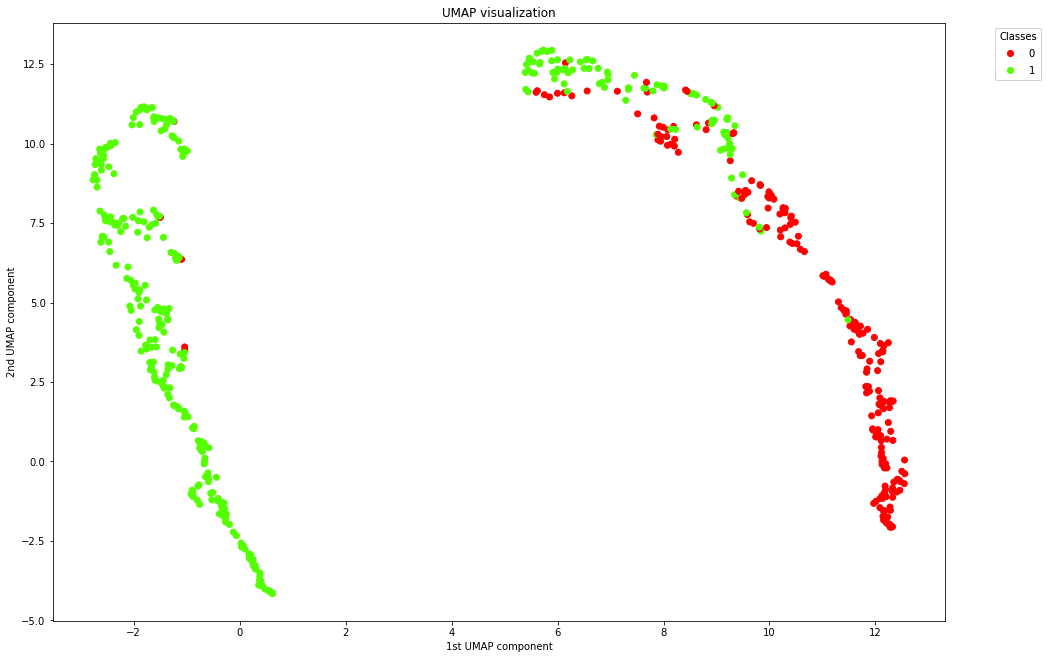

In [59]:
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=umap_transform[:,0], 
    y=umap_transform[:,1], 
    c=cancer['target'], 
    cmap=plt.cm.get_cmap('prism')
)
# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("UMAP visualization")
plt.xlabel("1st UMAP component")
plt.ylabel("2nd UMAP component")
plt.show()